# Nozzle Design Version 1

In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

This notebook calculates the 1D isentropic flow through a supersonic gas jet nozzle with a given area profile.

The mach number is related to the area of the nozzle by
$$\frac{A}{A^*} = \frac{1}{M}\left(\frac{2+(k-1)M^2}{1+k}\right)^{(k+1)/[2(k-1)]},$$
where $A^*$ is the throat area of the converging diverging nozzle. As an aside, in a sonic nozzle the above equation still works but the value of $A^*$ does not correspond to a physical area in the nozzle. Instead, it can be interpretted as the area the throat would have to be reduced to in order to form a supersonic nozzle. 

Once the mach number through the nozzle is determined, the pressure, temperature, and density follow straightforwardly:
$$\frac{p}{p_0} = \left(\frac{2}{2+(k-1)M^2}\right)^{k/(k-1)},$$
$$\frac{T}{T_0} = \frac{2}{2+(k-1)M^2},$$
$$\frac{\rho}{\rho_0} = \left(\frac{2}{2+(k-1)M^2}\right)^{1/(k-1)}$$

For the 1D isentropic flow approximation to be correct, the nozzle has to have smooth walls and thus the theory does not apply in the upstream reservoir or after the exit of the nozzle. The consequence of this is that the pressure at the entrance of the nozzle can be lower than the pressure of the reservoir and the pressure at the exit of the nozzle can be higher than the background pressure.

Typically, the radius that includes 95% of the mass flow is used to measure the plume expansion on cylindrical gas jets. From Schmid and Veisz (2012) the expansion of this radius is typically linear leading to a $1/z^2$ reduction in gas density as the plume expands. Assuming a linear expansion in one direction for an elongated gas jet, the density should reduce as $1/z$ above the gas jet. They measured expansion cones half angles on the order of 30deg so the density should increase above the nozzle as
$$\rho = \rho_e\frac{1}{1+(2z\sin\theta)/w_e} = \rho_e\frac{1}{1+z/w},$$
where $w$ is the width of the nozzle exit and $z$ is the distance above the nozzle exit.

Bessel beam ionization optics require a beam stay clear 2cm in diameter meaning the plasma has to be formed at least 1cm above the exit of the nozzle. For repitition rate reasons, it is advantageous to reduce the gas flow rate through the nozzle and thus work as close to the nozzle exit as possible. The plasma is thus formed $z_p=1\,\mathrm{cm}$ above the exit of the nozzle. Assuming a hydrogen plasma, the plasma density is twice the gas density $n_{e0}=2\rho$. Putting this together the gas density at the nozzle exit is given by
$$\rho_e = \frac{1}{2}n_{e0}\left(1+\frac{z_p}{w_e}\right).$$

In [2]:
# Estimate the nozzle width and gas density required at the exit of the nozzle
# for a target plasma density of n_e=3.5e16cm^-3 1cm above the nozzle
# Assuming a hydrogen plasma, the plasma desnity is double the gas density
z_p = 10. #mm
n_e0 = 3.5e16 #cm^-3
L = 400. #mm
k = 1.41
T_0 = 300 #K


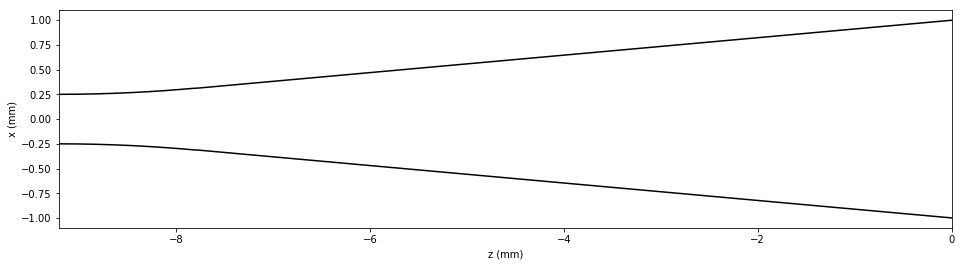

In [6]:
# The diverging part of the nozzle is a simple conical nozzle with angle alpha
# The throat will be radiused with radius r_t and width w_t
# The area ratio is equal to the width ratio of the nozzle, w_e/w_t
alpha = np.radians(10.) # deg
w_e = 2. #mm
w_t = 0.5 #mm
r_t = 8. #mm
Z_n = r_t*np.sin(alpha)+(w_e-w_t-r_t*(1-np.cos(alpha)))/np.tan(alpha)
N = 200
z, dz = np.linspace(-Z_n, 0, N, retstep=True)
w = np.zeros(N)
# Throat curvature
edge = -Z_n+r_t*np.sin(alpha)
sel = z <= edge
w[sel] = (w_t-np.sqrt(r_t**2-(z[sel]+Z_n)**2)+r_t)
# Conical nozzle
sel = z > edge
w[sel] = (w_t+r_t*(1-np.cos(alpha)))+np.tan(alpha)*(z[sel]-z[sel][0]+0.5*dz)

plt.figure(figsize=(16, 4))
plt.plot(z, w/2, 'k')
plt.plot(z, -w/2, 'k')
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.xlim(-Z_n, 0)
plt.show()

1.4574514978639304e+18
300
6036.686859223013


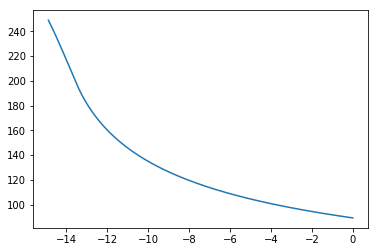

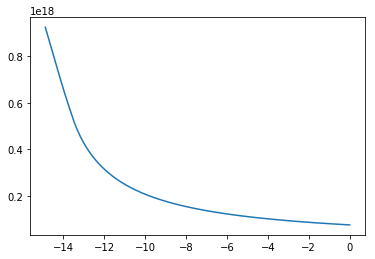

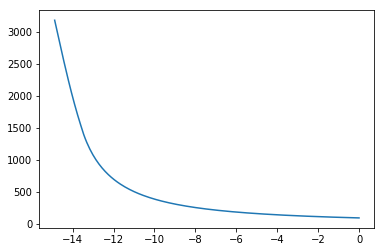

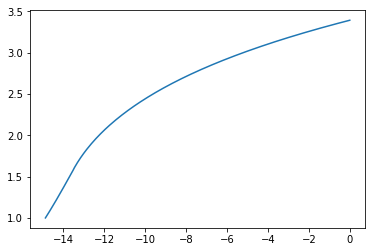

In [4]:
# The diverging part of the nozzle into vaccum is 
AA = lambda M: (1/M)*((2+(k-1)*M**2)/(1+k))**((k+1)/(2*k-2))
# Invert the top half of the curve above M=1
M = np.linspace(1, 8, 1000)
MofA = interp1d(AA(M), M)
M = MofA(w/w_t)
T = 2*T_0/(2+(k-1)*M**2)
rho = (2/(2+(k-1)*M**2))**(1/(k-1))
rho_e = 0.5*n_e0*(1+z_p/w_e)
rho_0 = rho_e/rho[-1]
rho = rho_0*rho
p_0 = rho_0*T_0*1.380649e-23*1e6
p = p_0*(2/(2+(k-1)*M**2))**(k/(k-1))
print(rho_0)
print(T_0)
print(p_0)
plt.plot(z, T)
plt.show()
plt.plot(z, rho)
plt.show()
plt.plot(z, p)
plt.show()
plt.plot(z, M)
plt.show()

In [5]:
1.380649e-23*2.5e25*300

103548.675